 # Galaxy Type Classification with Random Forests Supervised Learning

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from support_functions import plot_confusion_matrix, generate_features_targets
from pprint import pprint


 ## Load Dataset to train the system


In [2]:
data = np.load('galaxy_catalogue.npy')

### Print dataset

In [3]:
pprint (data)

array([ (  1.85765,  0.67158,  0.4231 ,  0.3061 ,  0.5854284,   2.25194600e+00,   2.33984900e+00,   2.38065200e+00,   2.35973800e+00,   2.39552800e+00,   3.09512300e+00,    3.818919 ,   3.82623000e+00,   5.17481400e+00,    8.263009,   1.14773400e+01, u'merger'),
       (  1.74259,  0.86085,  0.44927,  0.28851,  0.7498125,   2.03156600e+00,   2.08415600e+00,   2.09227200e+00,   2.12407500e+00,   2.13315400e+00,   1.43043600e+00,    1.422533 ,   1.38572700e+00,   3.73271200e+00,    3.416921,   3.33034700e+00, u'merger'),
       (  2.10697,  0.9671 ,  0.5681 ,  0.33747,  0.6300893,   1.99288700e+00,   2.45074600e+00,   2.47311600e+00,   2.46532400e+00,   2.43868300e+00,   3.09995700e+00,    3.623704 ,   3.46330000e+00,   9.11085700e+00,    8.354343,   1.12653900e+01, u'merger'),
       (  1.2284 ,  0.60446,  0.39049,  0.28913,  0.6689994,   2.05611500e+00,   2.18225200e+00,   2.30951000e+00,   2.39141400e+00,   2.47239700e+00,   3.62726700e+00,    4.063471 ,   3.71770800e+00,   9.58067500

 ## Create Train and Test Datasets


 ### Define features (X) and targets (y)
 


In [4]:
features, targets = generate_features_targets(data)

## Configure, train and test ML algorithm, Random Forests

### Create classifier RFC object

In [5]:
rfc = RandomForestClassifier(n_estimators=50,max_depth=20)

### Train the classifier, (fit the estimator) using the training dataset
#### Use cross_val_predict to split test and training data using k-folds sets.
#### The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.



In [6]:
predicted = cross_val_predict(rfc, features, targets, cv=10)
rfc.fit(features, targets)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

# Calculate the model score and Confusion Matrix 

In [7]:
model_score = accuracy_score(targets, predicted)
print "Our accuracy score: " +  str(model_score)


Our accuracy score: 0.864102564103


In [8]:
# calculate the models confusion matrix using sklearns confusion_matrix function
class_labels = list(set(targets))
print (class_labels)
model_cm = confusion_matrix(y_true=targets, y_pred=predicted, labels=class_labels)


[u'merger', u'spiral', u'elliptical']


Confusion matrix, without normalization
[[212  34  14]
 [ 42 216   2]
 [ 13   1 246]]


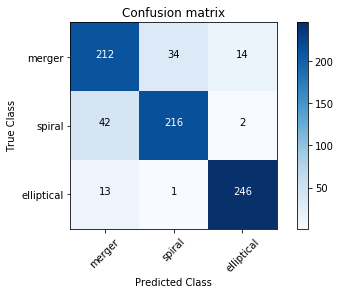

In [9]:
# Plot the confusion matrix using the provided functions.
plt.figure()
plot_confusion_matrix(model_cm, classes=class_labels, normalize=False)
plt.show()


# Classify new unseen data

In [10]:
galaxy_type_prediction = rfc.predict([[ 1.86765 ,    0.68158   ,  0.4131     , 0.3161   ,   0.5954284  , 2.261946  , 2.349849  ,  2.380652  ,  2.359738  ,  2.395528  ,  0.5981129  , 0.4621705 , 0.33337254  ]])
print (galaxy_type_prediction)

[u'merger']


# Tune RFC algorithm

### How sensitive is RFC classification accuracy to the choice of the 'n_estimators' , 'max_depth' and 'cv' parameters?

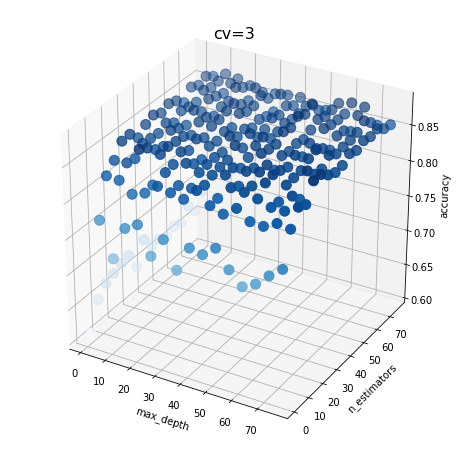

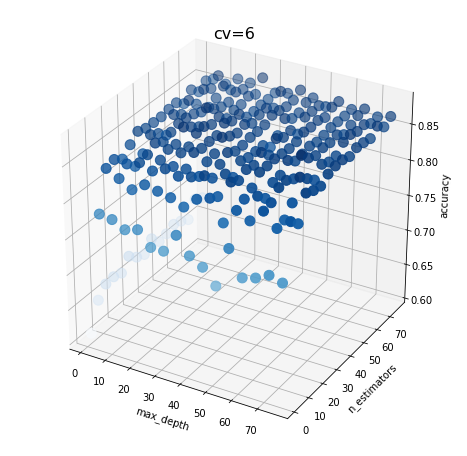

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

md_range = range(1,80,5)
ne_range = range(1,80,5)
cv_range = range(3,20,3)

for cv_value in cv_range:

    xs = []
    ys = []
    zs = []

    for md in md_range:
        for ne in ne_range:
            clf = RandomForestClassifier(n_estimators=ne,max_depth=md)
            predicted = cross_val_predict(clf, features, targets, cv=cv_value)
            clf.fit(features, targets)
            model_score = accuracy_score(targets, predicted)
            xs.append(md)
            ys.append(ne)
            zs.append(model_score)

        
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(xs, ys, zs, c=zs, cmap='Blues', s=100)
    ax.set_xlabel('max_depth')
    ax.set_ylabel('n_estimators')
    ax.set_zlabel('accuracy')
    ax.set_title('cv=%s' %cv_value, fontsize=16)

    plt.show()